### IMPORTING NECESSARY PACKAGES

In [53]:
import os
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### SOME FUNCTIONS

In [111]:
def plot_hist(data, feat_name, bns, col, show = True, out = None, dpi = 100, figsize = (5, 5), yticks = None, et = None):
    """
    """
    if type(data) != list:
        data = data.tolist()
    st_median = round(statistics.median(data), 2)
    st_mean = round(statistics.mean(data), 2)
    st_max = round(max(data),2)
    st_min = round(min(data), 2)
    print("\tMIN = {}\tMEAN = {}\tMEDIAN = {}\tMAX = {}".format(st_min, st_mean, st_median, st_max))
    
    fig = plt.figure(figsize = figsize, dpi = dpi)
    sns.histplot(data, fill = True, color = col, stat = "count", element = "step", bins = bns, log_scale = (False, 10))
    plt.ylabel("log(count)")
    plt.xlabel(feat_name)
    plt.axvline(x = st_median, linewidth = 1, color = "k", linestyle = "--")
    if et != None:
        plt.axvline(x = et, linewidth = 2, color = "r", linestyle = "--")
    
    if yticks != None:
        plt.yticks(yticks)
    #plt.legend(edgecolor = "k")
    if out != None:
        plt.savefig(out)
    if show == False:
        plt.close()

### READING INPUT DATA

In [52]:
main_dir = "/Users/2394007/Documents/PHD/LOCAL/FRAGSYS_DEF/"
val_d = pd.read_pickle(os.path.join(main_dir, "results", "validation_data.pkl"))

In [5]:
val_d.shape

(1121927, 34)

In [6]:
print(val_d.columns.tolist())

['pdb_id', 'validation_NatomsEDS', 'validation_altcode', 'validation_avgoccu', 'validation_chain', 'validation_cis_peptide', 'validation_ent', 'validation_flippable-sidechain', 'validation_icode', 'validation_ligand_chirality_outlier', 'validation_ligand_clashes_outlier', 'validation_ligand_geometry_outlier', 'validation_ligand_num_clashes', 'validation_ligand_num_symm_clashes', 'validation_model', 'validation_mogul-ignore', 'validation_mogul_angles_rmsz', 'validation_mogul_bonds_rmsz', 'validation_mogul_rmsz_numangles', 'validation_mogul_rmsz_numbonds', 'validation_num-H-reduce', 'validation_owab', 'validation_phi', 'validation_psi', 'validation_rama', 'validation_resname', 'validation_resnum', 'validation_resnum_full', 'validation_rota', 'validation_rscc', 'validation_rsr', 'validation_rsrz', 'validation_said', 'validation_seq']


In [134]:
cs = [
    "pdb_id", "validation_chain",
    #'validation_ligand_chirality_outlier', 'validation_ligand_clashes_outlier', 'validation_ligand_geometry_outlier',
    #'validation_ligand_num_clashes', 'validation_ligand_num_symm_clashes',
    'validation_resname', 'validation_resnum', #'validation_resnum_full',
    'validation_rsr', 'validation_rscc', 'validation_rsrz',
    #'validation_said', 'validation_seq'
]

In [21]:
print(sub.validation_resname.unique().tolist())

['MET', 'LEU', 'LYS', 'GLN', 'THR', 'VAL', 'ASP', 'HIS', 'PRO', 'GLY', 'ALA', 'ARG', 'GLU', 'ILE', 'TYR', 'ASN', 'SER', 'CYS', 'PHE', 'TRP', 'EDO', 'PO4', 'NY7', 'HOH']


### VALIDATION ANALYSIS FOR ALL RESIDUES

1111797
	MIN = 0.01	MEAN = 0.14	MEDIAN = 0.11	MAX = 4.27


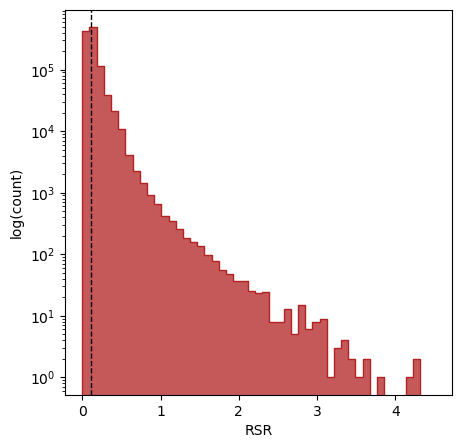

In [108]:
d_rsr = val_d.query('validation_rsr == validation_rsr')
print(len(d_rsr))
bns_rsr = np.linspace(0, 4.5, 50)
plot_hist(d_rsr.validation_rsr, "RSR", bns_rsr, "firebrick")

1111797	933518	83.96%
	MIN = -0.76	MEAN = 0.91	MEDIAN = 0.94	MAX = 1.0


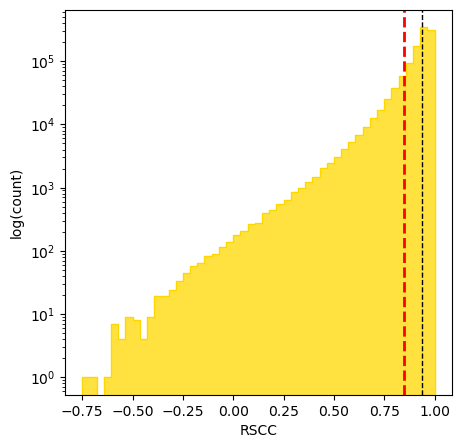

In [97]:
d_rscc = val_d.query('validation_rscc == validation_rscc')
rscc_len = len(d_rscc)
rscc_t_len = len(d_rscc.query('validation_rscc > 0.85'))
print("{}\t{}\t{}%".format(rscc_len, rscc_t_len, round(100*(rscc_t_len/rscc_len),2)))
bns_rscc = np.linspace(-0.75, 1.0, 50)
plot_hist(d_rscc.validation_rscc, "RSCC", bns_rscc, "gold", et = 0.85)

643193	590313	91.78%
	MIN = -1.74	MEAN = 0.38	MEDIAN = -0.06	MAX = 38.63


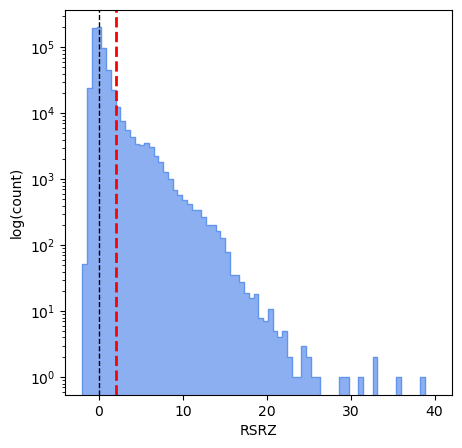

In [109]:
d_rsrz = val_d.query('validation_rsrz == validation_rsrz')
rsrz_len = len(d_rsrz)
rsrz_t_len = len(d_rsrz.query('validation_rsrz < 2'))
print("{}\t{}\t{}%".format(rsrz_len, rsrz_t_len, round(100*(rsrz_t_len/rsrz_len),2)))
bns_rsrz = np.linspace(-2, 40, 75)
plot_hist(d_rsrz.validation_rsrz, "RSRZ", bns_rsrz, "cornflowerblue", et = 2)

### APPLY FILTERS

In [100]:
q = 'validation_rsr == validation_rsr & validation_rscc == validation_rscc & validation_rsrz == validation_rsrz & validation_rscc > 0.85 & validation_rsrz < 2'
val_d_filt = val_d.copy().query(q)

	MIN = 0.85	MEAN = 0.95	MEDIAN = 0.95	MAX = 1.0


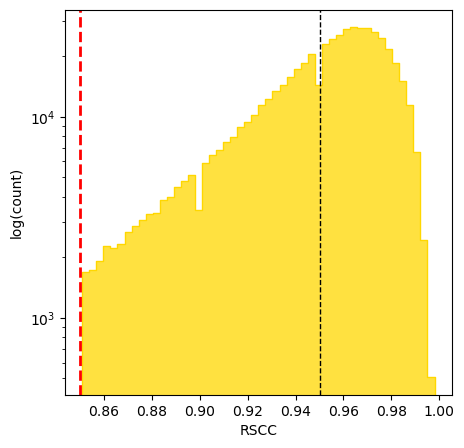

In [106]:
#bns_rscc = np.linspace(-0.75, 1.0, 50)
plot_hist(val_d_filt.validation_rscc, "RSCC", 50, "gold", et = 0.85)

	MIN = -1.74	MEAN = -0.05	MEDIAN = -0.16	MAX = 2.0


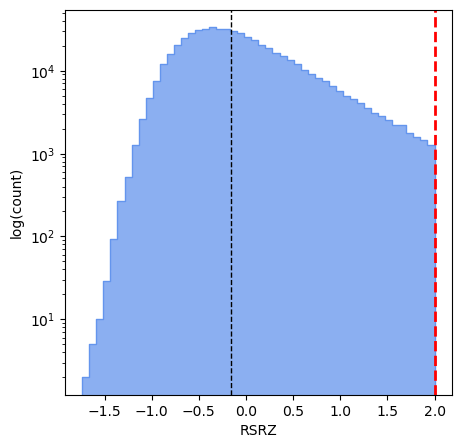

In [110]:
#bns_rscc = np.linspace(-0.75, 1.0, 50)
plot_hist(val_d_filt.validation_rsrz, "RSRZ", 50, "cornflowerblue", et = 2)

### LOOKING AT QUALITY OF LIGANDS

In [117]:
pdb_resnames = [
    "ALA", "CYS", "ASP", "GLU", "PHE", "GLY", "HIS", "ILE", "LYS", "LEU",
    "MET", "ASN", "PRO", "GLN", "ARG", "SER", "THR", "VAL", "TRP", "TYR"
]

simple_ions = [
    "ZN", "MN", "CL", "MG", "CD", "NI", "NA", "IOD", "CA", "BR", "XE", "TB", #FE, K, CO, NO3, AZI, R
]

acidic_ions = [
    "PO4", "ACT", "SO4", "MLI", "CIT", "ACY", "VO4", "WO4"
]

non_relevant_ligs_manual = [
    "DMS", "EDO", "HOH", "TRS", "GOL", "OGA", "FMN", "PG4", "PGR",
    "MPD", "TPP", "MES", "PLP", "HYP", "CSO", "UNX", "EPE", "PEG",
    "PGE", "DOD", "SUI", "BEN", "BOG"
]

non_relevant = non_relevant_ligs_manual + simple_ions + acidic_ions



In [118]:
val_d_lig = val_d.query('validation_resname not in @pdb_resnames & validation_resname not in @non_relevant')

In [119]:
val_d_lig.shape

(2189, 34)

In [120]:
val_d_lig.validation_resname.value_counts()

K0G    14
JOV    11
SY4    11
GV1    11
JMM    10
       ..
T67     1
UPD     1
T5V     1
UPJ     1
5ZE     1
Name: validation_resname, Length: 1126, dtype: int64

2133	632	29.63%
	MIN = -0.18	MEAN = 0.71	MEDIAN = 0.76	MAX = 1.0


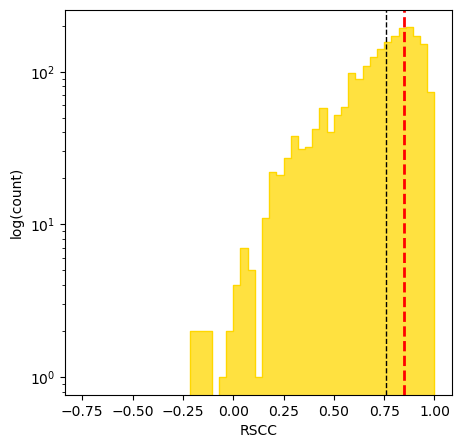

In [121]:
d_rscc_lig = val_d_lig.query('validation_rscc == validation_rscc')
rscc_len = len(d_rscc_lig)
rscc_t_len = len(d_rscc_lig.query('validation_rscc > 0.85'))
print("{}\t{}\t{}%".format(rscc_len, rscc_t_len, round(100*(rscc_t_len/rscc_len),2)))
bns_rscc = np.linspace(-0.75, 1.0, 50)
plot_hist(d_rscc_lig.validation_rscc, "RSCC", bns_rscc, "gold", et = 0.85)

### SOME EXAMPLES

In [128]:
sub = val_d.query('pdb_id == "5rhg"')

In [136]:
sub.query('validation_resname == "NY7"')[cs]

,pdb_id,validation_chain,validation_resname,validation_resnum,validation_rsr,validation_rscc,validation_rsrz
442,5rhg,A,NY7,704,0.217,0.665,NaN
443,5rhg,A,NY7,705,0.166,0.823,NaN


In [130]:
BS0 = [264, 265, 267, 268, 271, 293, 493, 536, 537, 540]

In [135]:
sub.query('validation_resnum in @BS0')[cs]

,pdb_id,validation_chain,validation_resname,validation_resnum,validation_rsr,validation_rscc,validation_rsrz
82,5rhg,A,ALA,264,0.066,0.966,-0.400
83,5rhg,A,THR,265,0.058,0.971,-0.612
85,5rhg,A,THR,267,0.053,0.977,-0.731
86,5rhg,A,SER,268,0.043,0.978,-0.904
89,5rhg,A,LEU,271,0.088,0.917,-0.027
111,5rhg,A,SER,293,0.053,0.980,-0.703
313,5rhg,A,LEU,493,0.066,0.959,-0.690
356,5rhg,A,MET,536,0.065,0.981,-0.531
357,5rhg,A,LYS,537,0.213,0.865,1.554
360,5rhg,A,ASP,540,0.071,0.952,-0.466
